[View in Colaboratory](https://colab.research.google.com/github/tiensu/DATA_SCIENCE_PJ/blob/master/Predict_Employee_Churn.ipynb)

https://www.datacamp.com/community/tutorials/predicting-employee-churn-python

In [0]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline

In [0]:
# Load data
data=pandas.read_csv('./drive/My Drive/MACHINE_LEARNING_CODE/DATA_SET/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [0]:
"""Jump into Data Insights"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [0]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [0]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


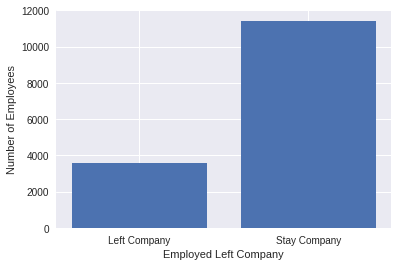

In [0]:
"""Data Visualization"""
# how many employees were left?
left_count = data.groupby('left').count()
plt.bar(['Stay Company', 'Left Company'], left_count.satisfaction_level)
plt.xlabel('Employed Left Company')
plt.ylabel('Number of Employees')
plt.show()

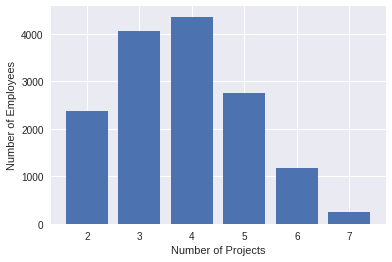

In [0]:
# Number of Projects
num_projects = data.groupby('number_project').count()
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()


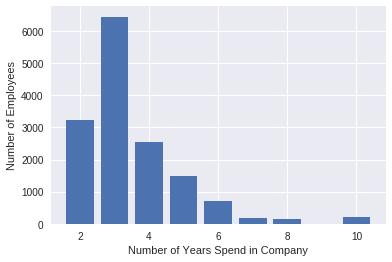

In [0]:
# Time Spent in Company
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


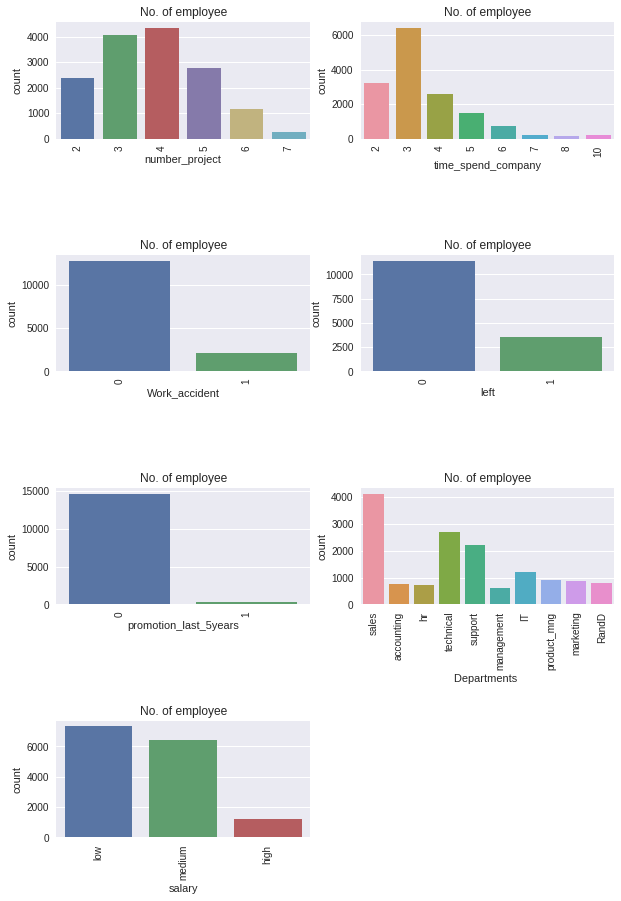

In [0]:
# use Seaborn library and plot all the graphs in a single 
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
  plt.subplot(4,2,i+1)
  plt.subplots_adjust(hspace=1.0)
  sns.countplot(x=j, data=data)
  plt.xticks(rotation=90)
  plt.title('No. of employee')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


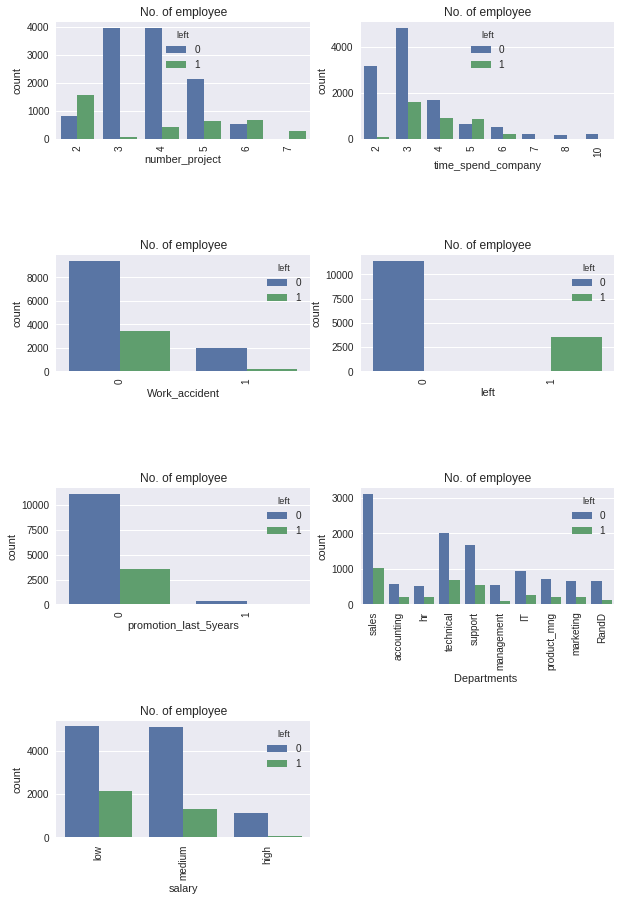

In [0]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [0]:
"""Cluster Analysis"""

from sklearn.cluster import KMeans

# Filter data
left_emp = data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(left_emp)

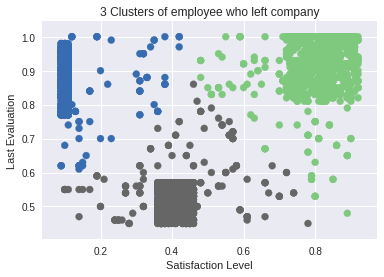

In [0]:
# Add new column 'label' and assign cluster label
left_emp['label'] = kmeans.labels_
# Draw scater plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employee who left company')
plt.show()

In [0]:
"""Building a Prediction Model"""

# Preprocessing data
from sklearn import preprocessing
# Create labelEncoder
le = preprocessing.LabelEncoder()
# Convert string labels into numbers
data.salary = le.fit_transform(data.salary)
data['Departments '] = le.fit_transform(data['Departments '])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [0]:
# Split data
X = data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y = data.left

In [0]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
# Model Building using Gradient Boosting Classifier.
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train the model using the training sets
gb.fit(X_train, y_train)

# Predict the response for test class
y_pred = gb.predict(X_test)

In [0]:
# Evaluating Model Performance
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
# Model precision
print('Precision:', metrics.precision_score(y_test, y_pred))
# Model recall
print('Recall: ', metrics.recall_score(y_test, y_pred))

Accuracy:  0.9713333333333334
Precision: 0.9573229873908826
Recall:  0.9207089552238806
